# Проект Яндекс.Недвижимость

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

* Необходимо изучить рынок недвижимости и понять, какие факторы влияют на стоимость жилья

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**План работы:**

* Импортировать все нужные библиотеки, и посмотреть на датасет

* Очистить датасет от пропусков

* Убрать аномалии

* Проанализировать параметры 

* Добавить несколько новых признаков

* Выявить взаимосвязь между параметрами

* Сделать выводы по результатам анализа

## Анализ данных

*Импорт необходимых библиотек*

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import phik

*В data читаем наш файл разделением табуляцией*

In [2]:
data = pd.read_csv('real_estate_data (1).csv', sep='\t')

*Узнаем размерность таблицы*

In [3]:
data.shape

(23699, 22)

*Смотрим на колонки и типы данных в них*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*Смотрим как выглядит наша таблица*

In [5]:
display(data.head(6))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


### Предобработка данных

**Считаем количество пропусков в таблице**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Визуализируем для наглядности

In [7]:
def pass_value_barh(df):
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16, color='pink', ec="black", lw= 1)
            .set_title('Пропуски в данных' + "\n", fontsize = 22, color = 'black')    
        );

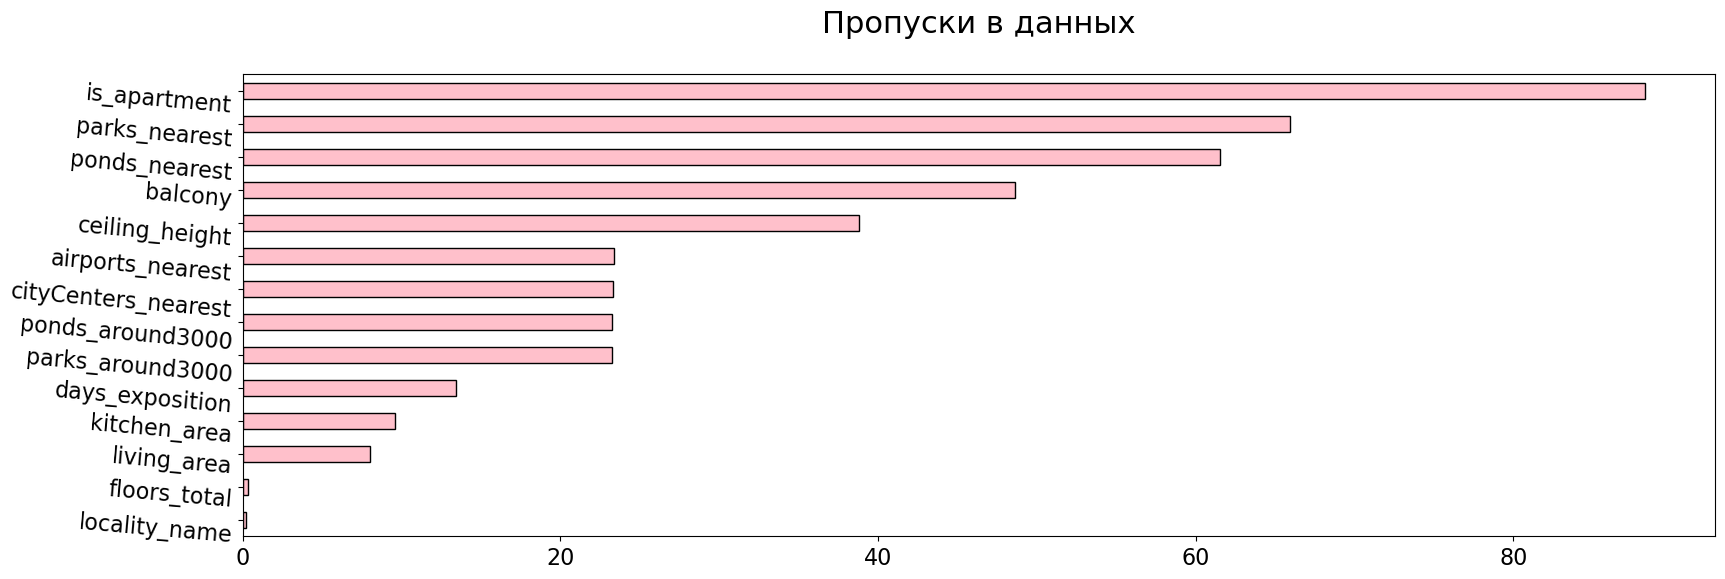

In [8]:
pass_value_barh(data)

*Наибольшее количество пропусков в is_apartment,parks_nearest и ponds_nearest.*

#### **is_apartment**

*Смотрим столбец 'is_apartment' так как в нем наибольшее количество пропусков*

In [9]:
print(data['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


*Есть предположение, что пропуски можно заполнить значением False, так как понятно, что в нем может быть только два варианта. И если не стоит True, значит скорее всего это False*

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].value_counts())

False    23649
True        50
Name: is_apartment, dtype: int64


*Предварительно пропуски заполнились и теперь этот столбец имеет тип данных bool  как и должно быть*

*Посчитаем пропуски теперь*

In [11]:
data['is_apartment'].isna().sum()

0

*Всего 50 апартаментов из всего датасета, не сильно популярный тип недвижимости*

#### **balcony**

*Посмотрим на столбец 'balcony'*

In [12]:
data['balcony'].head()

0    NaN
1    2.0
2    0.0
3    0.0
4    NaN
Name: balcony, dtype: float64

*Можно предположить примерно то же, что и для 'is_apartment' - если бы балкон был, о нем была внесена информация, пропуски могут означать, что балкона нет, просто данные не были внесены или поставлен прочерк. Тогда заполняем пропуски нулями*

In [13]:
data['balcony'].fillna(0, inplace=True)
print(data['balcony'].head())

0    0.0
1    2.0
2    0.0
3    0.0
4    0.0
Name: balcony, dtype: float64


*Теперь можно поменять тип данных, потому что тут явно целочисленные значения должны быть, балконов ведь не может быть 1,5 штуки*

In [14]:
data['balcony'] = data['balcony'].astype('int')
print(data['balcony'].head())

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int32


In [15]:
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

*В основном балконов нет, 1 и 2 балкона в квартире встречаются примерно равное количество раз, больше - реже*

#### **total_images**

In [16]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

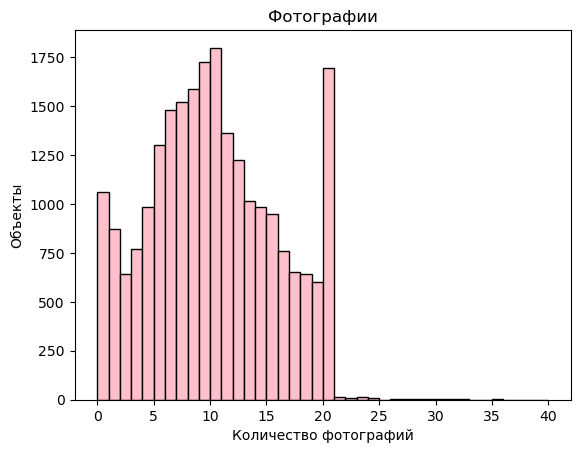

In [17]:
plt.hist(data['total_images'], color = 'pink', bins=40, ec="black", lw= 1, range=(0, 40));
plt.title('Фотографии')
plt.xlabel('Количество фотографий')
plt.ylabel('Объекты');

#### **ceiling_height**

*Столбец 'ceiling_height' возможно связан с этажностью здания, чем выше, тем невыше потолки, хотя никакой явной корреляции нет. Однако можно разбить этажность на группы и по медианам групп заполнить пропуски*

*Посмотрим на характеристики столбца*

In [18]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

*Странное максимальное значение, возможно стоит избавиться от аномальных значений по высоте потолков, все что больше 26 разделить на 10, может быть это ошибка в запятой*

In [19]:
data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] = data['ceiling_height'] / 10
data['ceiling_height'].describe()

count    14504.000000
mean         2.733740
std          0.425691
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         24.000000
Name: ceiling_height, dtype: float64

*25 потому что если разделить на 10, получается 2.5, что нормально. Но если например взять только больше 20, то высота потолка получается 2 метра, а это очень мало*

In [20]:
data.loc[data['ceiling_height'] >= 6, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] <= 2, 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].describe()

count    14504.000000
mean         2.726922
std          0.276466
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height, dtype: float64

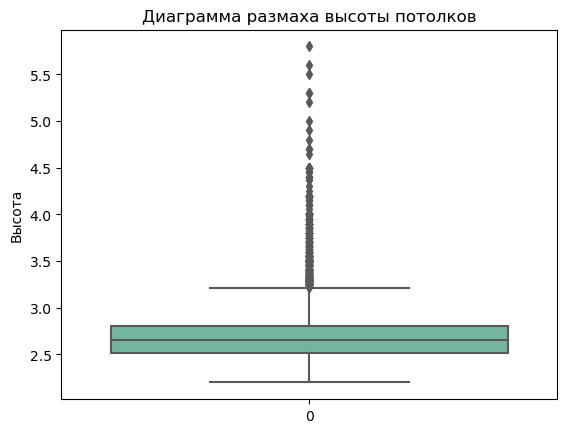

In [21]:
x = sns.boxplot(data=data['ceiling_height'], palette="Set2")
x.set_title('Диаграмма размаха высоты потолков')
x.set_ylabel('Высота');

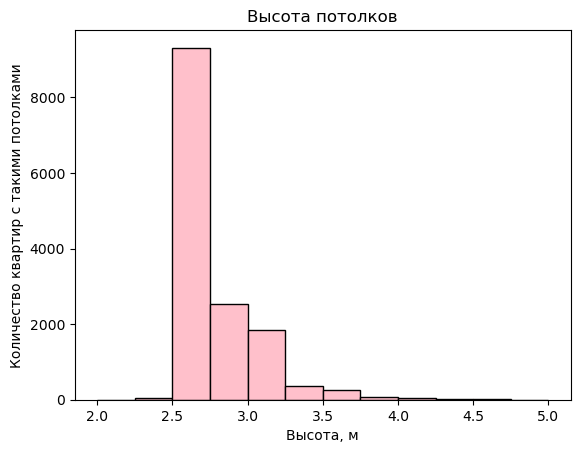

In [22]:
plt.hist(data['ceiling_height'], color = 'pink', bins=12, ec="black", lw= 1, range=(2,5));
plt.title('Высота потолков')
plt.xlabel('Высота, м')
plt.ylabel('Количество квартир с такими потолками');

In [23]:
for name in data['locality_name'].unique():
    data.loc[(data['ceiling_height'].isna() == True) & (data['locality_name'] == name), 'ceiling_height'] = \
    data.loc[(data['ceiling_height'].isna() == False) & (data['locality_name'] == name), 'ceiling_height'].median()
print(data['ceiling_height'].describe())    

count    23543.000000
mean         2.704181
std          0.224796
min          2.200000
25%          2.550000
50%          2.700000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64


*Общие характеристики выборки не сильно поменялись в результате заполнения пропусков медианным значением по городу, но появилось больше квартир, в которых потолок выше 2,5 и ниже 3 м, что выглядит более правдоподбно*

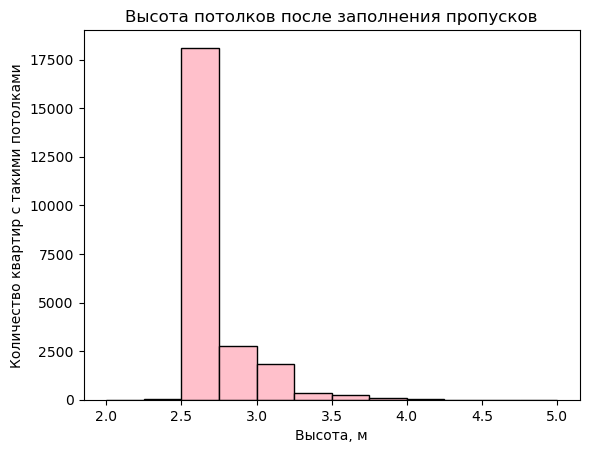

In [24]:
plt.hist(data['ceiling_height'], color = 'pink', bins=12, ec="black", lw= 1, range=(2, 5));
plt.title('Высота потолков после заполнения пропусков')
plt.xlabel('Высота, м')
plt.ylabel('Количество квартир с такими потолками');

*Большинство потолков находятся в диапазоне от 2.5 м до 3м, что похоже на правду это стандартная высота*

#### **living_area и total_area** 

In [25]:
data['living_area'].head()

0    51.0
1    18.6
2    34.3
3     NaN
4    32.0
Name: living_area, dtype: float64

In [26]:
print(data['living_area'].describe())

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


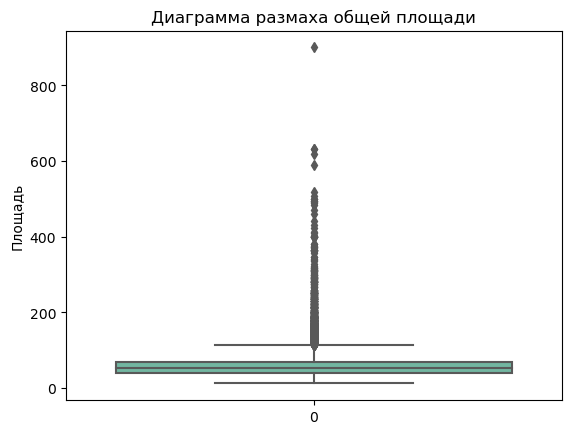

In [27]:
x = sns.boxplot(data=data['total_area'], palette="Set2")
x.set_title('Диаграмма размаха общей площади')
x.set_ylabel('Площадь');

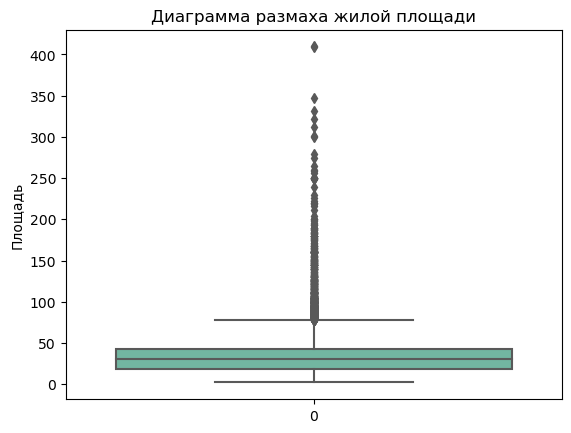

In [28]:
x = sns.boxplot(data=data['living_area'], palette="Set2")
x.set_title('Диаграмма размаха жилой площади')
x.set_ylabel('Площадь');

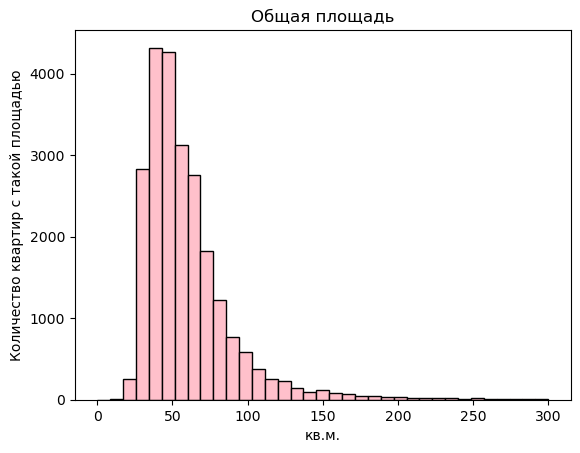

In [29]:
plt.hist(data['total_area'], color = 'pink', bins=35, ec="black", lw= 1, range=(0,300));
plt.title('Общая площадь')
plt.xlabel('кв.м.')
plt.ylabel('Количество квартир с такой площадью');

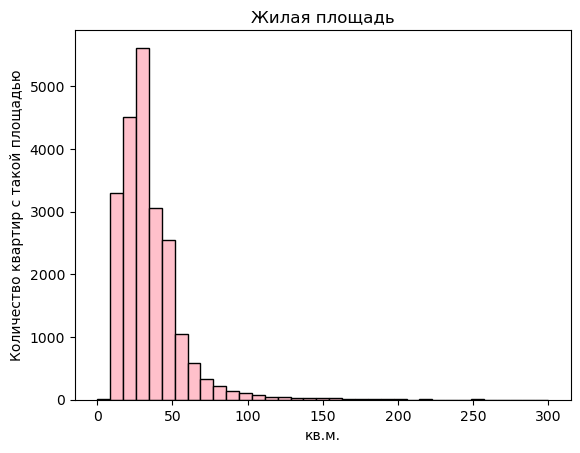

In [30]:
plt.hist(data['living_area'], color = 'pink', bins=35, ec="black", lw= 1, range=(0,300));
plt.title('Жилая площадь')
plt.xlabel('кв.м.')
plt.ylabel('Количество квартир с такой площадью');

*Опять непонятное максимальное значение в 900м^2, возможно опять нужно отсеить аномалии и посмотреть не сильно ли это повлияло на количество данных*

In [31]:
data = data = data.loc[data['total_area'] < 250]
print(data.shape)

(23583, 22)


*Немного данных почистилось, но в пределах разумного, 250 м квартиры конечно бывают, но точно не 900, и даже не 500. Немного даже частных домов имеет такую метражность*

*Разбиваем данные на группы по общей площади и на основе этого считаем у них медианное значение жилой площади, затем заполняем ими пропуски*

In [32]:
one = data.loc[data['total_area'] <= 40, 'living_area'].median()
two = data.loc[(data['total_area'] > 40) & (data['total_area'] <= 52), 'living_area'].median()
three = data.loc[(data['total_area'] > 52) & (data['total_area'] <= 70), 'living_area'].median()
four = data.loc[data['total_area'] > 70, 'living_area'].median()

In [33]:
data.loc[(data['living_area'].isna() == True) & (data['total_area'] <= 40), 'living_area'] = one

data.loc[(data['living_area'].isna() == True) & (data['total_area'] > 40) & (data['total_area'] <= 52), 'living_area'] = two

data.loc[(data['living_area'].isna() == True) & (data['total_area'] > 52) & (data['total_area'] <= 70), 'living_area'] = three

data.loc[(data['living_area'].isna() == True) & (data['total_area'] > 70), 'living_area'] = four

print(data['living_area'].isna().sum())

0


In [34]:
print(data['living_area'].head())

0    51.00
1    18.60
2    34.30
3    51.65
4    32.00
Name: living_area, dtype: float64


*Здесь  тип float нужен, так что оставим его*

In [35]:
data['total_area'].describe()

count    23583.000000
mean        58.955657
std         28.789785
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        249.900000
Name: total_area, dtype: float64

*Больше половины квартир имеют общую площадь свыше 52 кв.м., больше 75% - свыше 70 кв.м.*

Посмотрим поближе

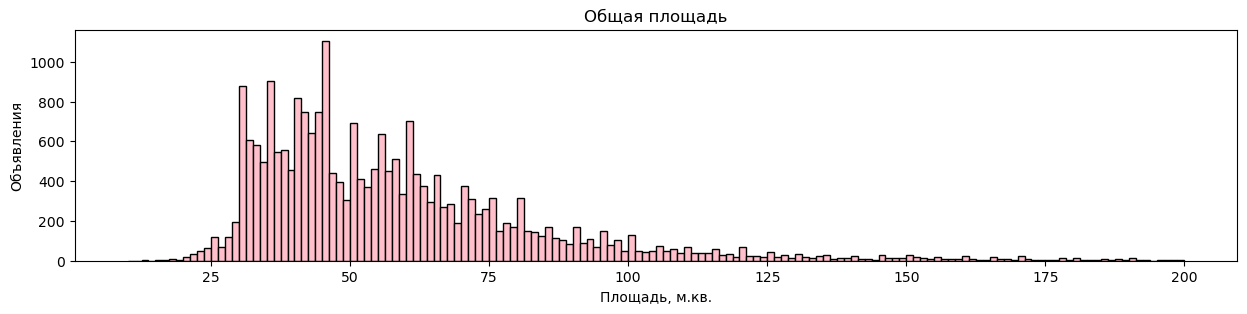

In [36]:
plt.figure(figsize=(15,3));
plt.hist(data['total_area'], color = 'pink', bins=152, ec="black", lw= 1, range=(10, 200))
plt.title('Общая площадь')
plt.xlabel('Площадь, м.кв.')
plt.ylabel('Объявления');

In [37]:
data['total_area'].describe()

count    23583.000000
mean        58.955657
std         28.789785
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        249.900000
Name: total_area, dtype: float64

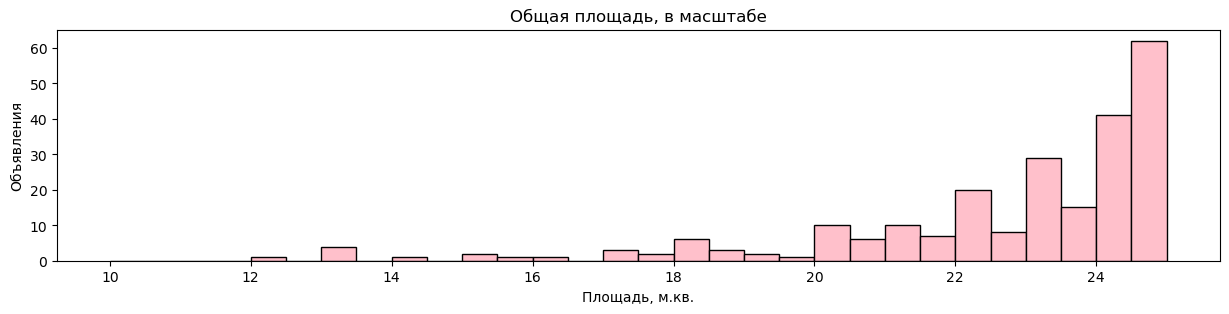

In [38]:
plt.figure(figsize=(15,3));
plt.hist(data['total_area'], color = 'pink', bins = 30, ec = "black", lw = 1, range = (10, 25))
plt.title('Общая площадь, в масштабе')
plt.xlabel('Площадь, м.кв.')
plt.ylabel('Объявления');

т.е. все квартиры менее 20-ти квадратных метров можно считать редкостями особенно это заметно на втором графике

In [39]:
data = data[(data['total_area'] > 20) | (data['rooms'].isna())]
data['total_area'].describe()

count    23548.000000
mean        59.017448
std         28.766337
min         20.100000
25%         40.000000
50%         52.000000
75%         69.100000
max        249.900000
Name: total_area, dtype: float64

Посмотрю другой хвост выборки

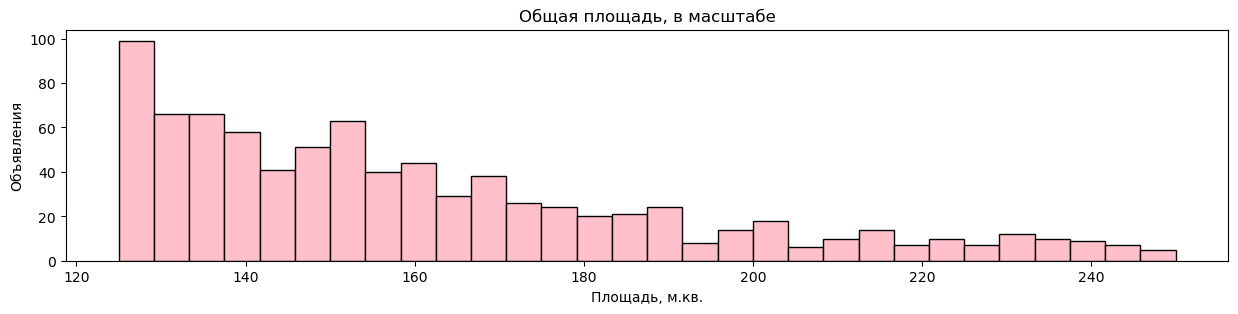

In [40]:
plt.figure(figsize=(15,3));
plt.hist(data['total_area'], color = 'pink', bins = 30, ec = "black", lw = 1, range = (125,250))
plt.title('Общая площадь, в масштабе')
plt.xlabel('Площадь, м.кв.')
plt.ylabel('Объявления');

Действительно, характеристика столбца не поменялась, кроме минимального значения

Стоит посмотреть жилую площадь на предмет выбросов 

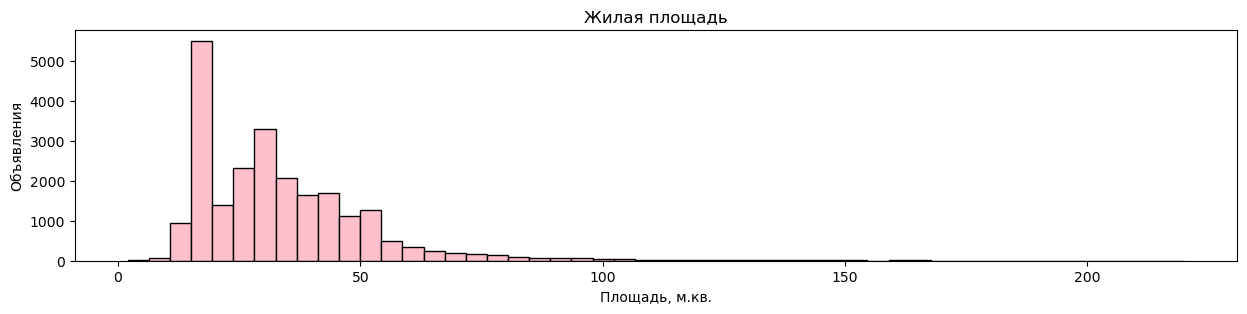

In [41]:
plt.figure(figsize=(15,3));
plt.hist(data['living_area'], color = 'pink', bins = 50, ec = "black", lw = 1)
plt.title('Жилая площадь')
plt.xlabel('Площадь, м.кв.')
plt.ylabel('Объявления');

In [42]:
data = data[(data['living_area'] > 9) | (data['living_area'].isna())]
data = data[(data['living_area'] < 120) | (data['living_area'].isna())]
data['living_area'].describe()

count    23393.000000
mean        33.126226
std         16.471788
min          9.100000
25%         18.600000
50%         30.000000
75%         42.000000
max        119.900000
Name: living_area, dtype: float64

####  **floors_total**

*у 'floor' заметная корреляция только с 'floors_total', но поскольку пропусков очень мало, я думаю можно просто взять этаж в колонке floor как последний и указать его в floors_total*

In [43]:
data['floors_total'].describe()

count    23308.000000
mean        10.721555
std          6.605186
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

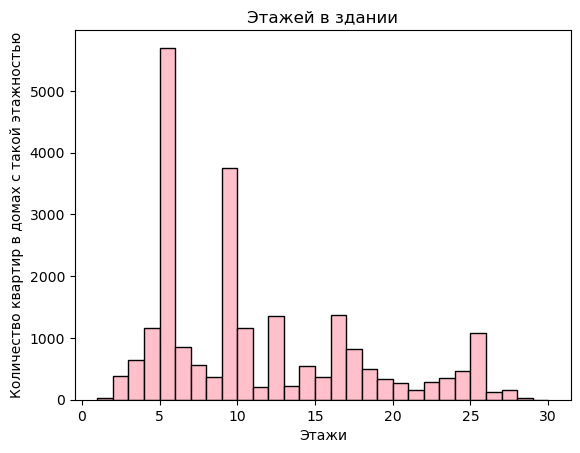

In [44]:
plt.hist(data['floors_total'], color = 'pink', bins=29, ec="black", lw= 1, range=(1,30));
plt.title('Этажей в здании')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир в домах с такой этажностью');

*Часто встречаются квартиры на продажу в домах, где всего 6 или 9 этажей, это скорее всего просто самая часто встречающаяся этажность зданий в Питере*

In [45]:
data['floors_total'].fillna(data['floor'], inplace=True)

print(data['floors_total'].isna().sum())

0


In [46]:
data['floors_total'] = data['floors_total'].astype('int')
print(data['floors_total'].head())

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int32


In [47]:
data = data[(data['floors_total'] < 30) | (data['floors_total'].isna())]

data['floors_total'].describe()

count    23361.000000
mean        10.684046
std          6.536872
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

####  **first_day_exposition**

*Работа со столбцом 'first_day_exposition', так как в  info() я заметила, что тип данных был object, а должен быть datetime64*

In [48]:
print(data['first_day_exposition'].head())

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object


*Видно, что дата в неправильном формате, это нужно изменить*

In [49]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


**Считаем явные дубликаты:**

In [50]:
data.duplicated().sum()

0

*Их нет, значит смотрим на неявные*

#### **locality_name**

**Посмотрим на уникальные значения столбца 'locality_name', он вызывает больше всего вопросов**

In [51]:
data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

*Внушительный список, посчитаем сколько всего уникальных значений на данный момент*

In [52]:
len(data['locality_name'].unique())

365

*То есть уникальных значений 365, и сразу видно, что некоторые НП написаны разными способами, я составила таблицу и отсортировала все неявные дубликаты и теперь занесла их в метод replace()*

In [53]:
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')

In [54]:
data['locality_name'] = data['locality_name'].replace('поселок Мурино','Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово','Кудрово')
data['locality_name'] = data['locality_name'].replace('Коммунар','поселок Коммунары')
data['locality_name'] = data['locality_name'].replace('городской поселок Фёдоровское','деревня Фёдоровское')
data['locality_name'] = data['locality_name'].replace('село Никольское','Никольское')
data['locality_name'] = data['locality_name'].replace('городской поселок Рощино','поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace('коттеджный поселок Лесное','поселок Лесное')
data['locality_name'] = data['locality_name'].replace('поселок Любань','Любань')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Приветнинское','поселок станции Приветнинское')
data['locality_name'] = data['locality_name'].replace('деревня Гарболово','поселок Гарболово')
data['locality_name'] = data['locality_name'].replace('городской поселок Назия','поселок городского типа Назия')
data['locality_name'] = data['locality_name'].replace('поселок Щеглово','деревня Щеглово')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Вещево','поселок станции Вещево')
data['locality_name'] = data['locality_name'].replace('городской поселок Мга','посёлок городского типа Мга')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рябово','поселок Рябово')
data['locality_name'] = data['locality_name'].replace('поселок Зимитицы','деревня Зимитицы')
data['locality_name'] = data['locality_name'].replace('городской поселок Лесогорский','поселок городского типа Лесогорский')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Большая Ижора','городской поселок Большая Ижора')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Советский','городской посёлок Советский')
data['locality_name'] = data['locality_name'].replace('городской поселок Павлово','село Павлово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Павлово','село Павлово')

*Теперь снова посчитаем количество уникальных значений, теперь их на 53 меньше*

In [55]:
len(data['locality_name'].unique())

312

*Теперь всем пропускам присвоим значение 'unknown' так как заполнить эти пропуски не представляется возможным, и посчитаем все пропуски для проверки*

In [56]:
data['locality_name'] = data['locality_name'].fillna('unknown')
data['locality_name'].isna().sum()

0

#### **parks_around3000 и ponds_around3000**

*С прудами и парками все сложно, ближайшие пруды/парки можно заполнить нулями, видимо в радиусе 3 км нет никого из них. Про ближайшие пруды/парки вообще ничего не известно, и корреляции вменяемой нет ни с каким столбцом, поэтому видимо придется оставить с пропусками*

In [57]:
data['parks_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)

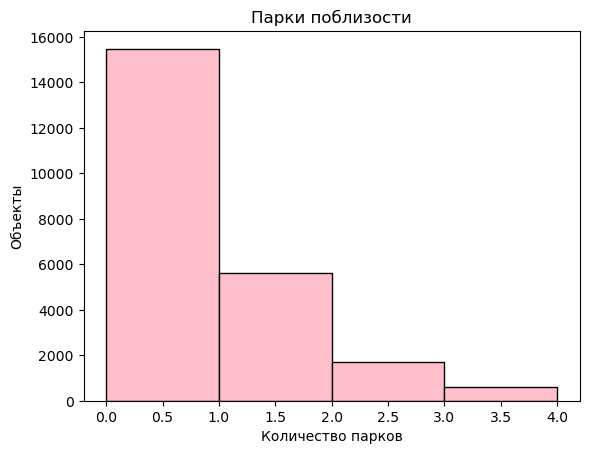

In [58]:
plt.hist(data['parks_around3000'], color = 'pink', bins=4, ec="black", lw= 1, range=(0,4));
plt.title('Парки поблизости')
plt.xlabel('Количество парков')
plt.ylabel('Объекты');

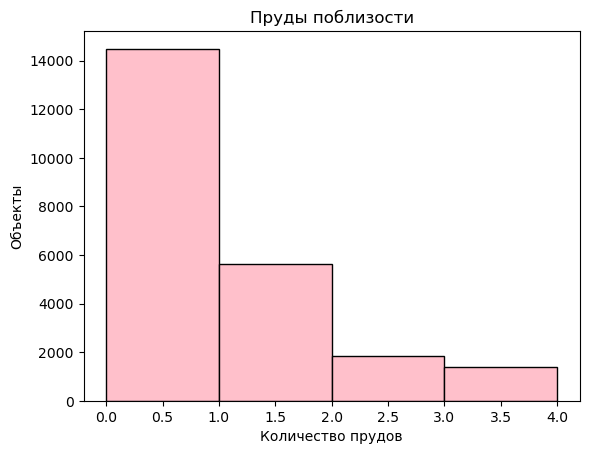

In [59]:
plt.hist(data['ponds_around3000'], color = 'pink', bins=4, ec="black", lw= 1, range=(0,4));
plt.title('Пруды поблизости')
plt.xlabel('Количество прудов')
plt.ylabel('Объекты');

#### **ponds_nearest и parks_nearest**

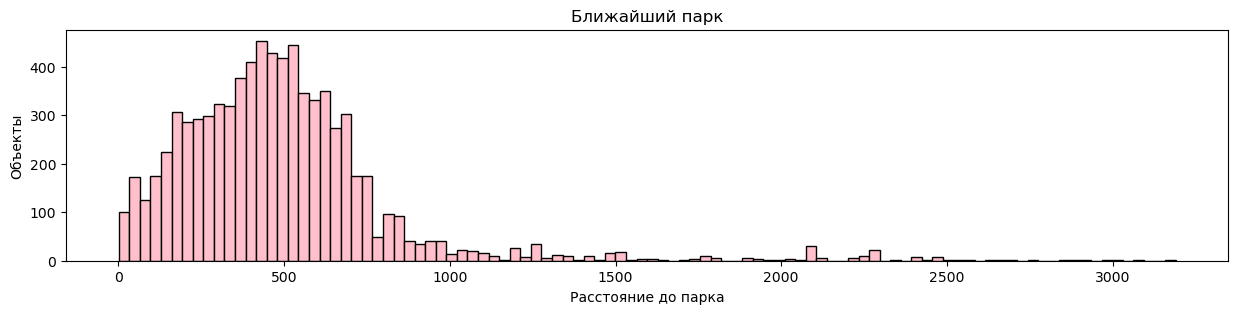

In [60]:
plt.figure(figsize=(15,3));
plt.hist(data['parks_nearest'], color = 'pink', bins=100, ec="black", lw= 1);
plt.title('Ближайший парк')
plt.xlabel('Расстояние до парка')
plt.ylabel('Объекты');

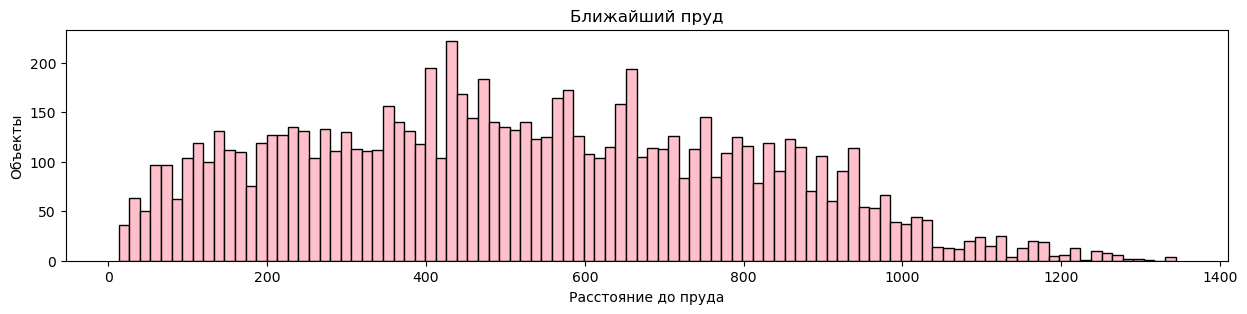

In [61]:
plt.figure(figsize=(15,3));
plt.hist(data['ponds_nearest'], color = 'pink', bins=100, ec="black", lw= 1);
plt.title('Ближайший пруд')
plt.xlabel('Расстояние до пруда')
plt.ylabel('Объекты');

#### **kitchen_area**

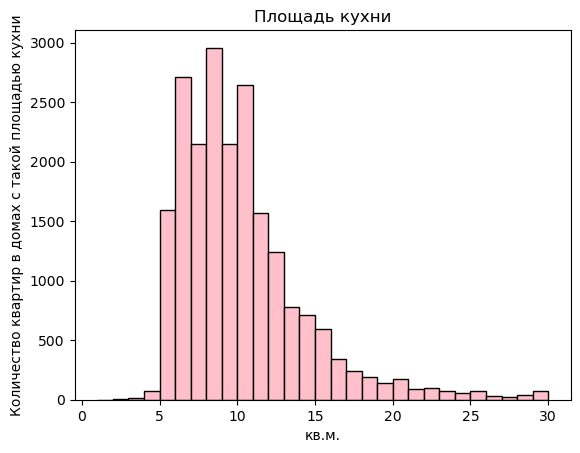

In [62]:
plt.hist(data['kitchen_area'], color = 'pink', bins=29, ec="black", lw= 1, range=(1,30));
plt.title('Площадь кухни')
plt.xlabel('кв.м.')
plt.ylabel('Количество квартир в домах с такой площадью кухни');

In [63]:
data['kitchen_area'].describe()

count    21140.000000
mean        10.377512
std          5.434422
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        107.000000
Name: kitchen_area, dtype: float64

*Сейчас строк, подходящих под условие, что жилая площадь и кухня больше 0,9 от общей площади - 530 штук*

In [64]:
len(data.query('total_area*0.9 <= (living_area + kitchen_area)'))

511

*То есть аномальных значений стало не намного больше, возможно это те квартиры, где нет балкона*

In [65]:
data = data[(data['kitchen_area'] > 3) | (data['kitchen_area'].isna())]
data = data[(data['kitchen_area'] < 50) | (data['kitchen_area'].isna())]
print(data['kitchen_area'].describe())

count    21090.000000
mean        10.291495
std          4.949198
min          3.200000
25%          7.000000
50%          9.000000
75%         11.900000
max         49.400000
Name: kitchen_area, dtype: float64


In [66]:
len(data.query('total_area*0.9 <= (living_area + kitchen_area)'))

502

*Аномалий стало на 12 меньше*

*Еще раз посмотрим на график*

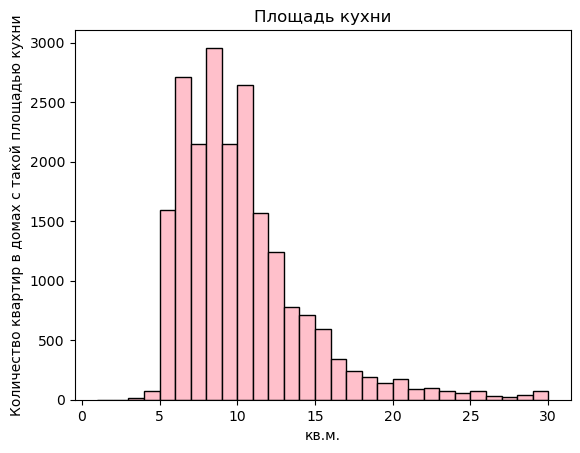

In [67]:
plt.hist(data['kitchen_area'], color = 'pink', bins=29, ec="black", lw= 1, range=(1,30));
plt.title('Площадь кухни')
plt.xlabel('кв.м.')
plt.ylabel('Количество квартир в домах с такой площадью кухни');

*Большинство кухонь, видимо 7, 9 и 11 кв.м.*

Почистим от выбросов

In [68]:
data = data[(data['kitchen_area'] > 4) | (data['kitchen_area'].isna())]
data = data[(data['kitchen_area'] < 35) | (data['kitchen_area'].isna())]
data['kitchen_area'].describe()

count    20901.000000
mean        10.086495
std          4.256516
min          4.100000
25%          7.000000
50%          9.000000
75%         11.700000
max         34.800000
Name: kitchen_area, dtype: float64

#### **days_exposition**

In [69]:
data['days_exposition'].head()

0      NaN
1     81.0
2    558.0
3    424.0
5     55.0
Name: days_exposition, dtype: float64

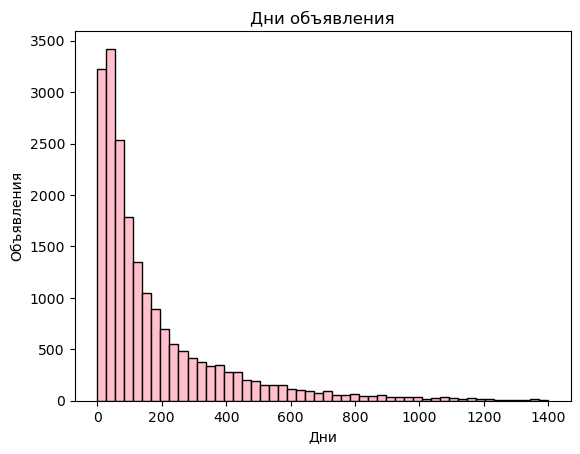

In [70]:
plt.hist(data['days_exposition'], color = 'pink', bins=50, ec="black", lw= 1, range=(0, 1400));
plt.title('Дни объявления')
plt.xlabel('Дни')
plt.ylabel('Объявления');

*Абсолютное большинство объявлений не висит дольше 200 дней, и так как пропусков много и заполнить их нечем, то и тип float на int не поменять*

In [71]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,122.00","23,122.00","22,967.00","20,064.00","23,122.00","23,122.00","20,901.00","23,122.00","23,122.00"
min,0.00,20.10,2.20,1.00,"430,000.00",9.10,4.10,1.00,1.00
max,9.00,241.00,5.80,"1,580.00","289,238,400.00",119.90,34.80,27.00,29.00


In [72]:
data['days_exposition'].describe()

count    20064.00000
mean       179.12191
std        217.57750
min          1.00000
25%         45.00000
50%         94.00000
75%        229.00000
max       1580.00000
Name: days_exposition, dtype: float64

*Думаю не имеет смысла рассматривать объявления, которые висят дольше 2 лет, за это время и цена могла поменяться и человек мог просто забыть снять с объявления*

In [73]:
data = data[(data['days_exposition'] < 730) | (data['days_exposition'].isna())]
data['days_exposition'].describe()

count    19347.000000
mean       150.032356
std        155.523135
min          1.000000
25%         43.000000
50%         90.000000
75%        205.000000
max        729.000000
Name: days_exposition, dtype: float64

In [74]:
data = data[(data['days_exposition'] > 10) | (data['days_exposition'].isna())]
data['days_exposition'].describe()

count    18116.000000
mean       159.795981
std        155.988612
min         11.000000
25%         45.000000
50%         99.000000
75%        218.000000
max        729.000000
Name: days_exposition, dtype: float64

#### **rooms**

In [75]:
data.rooms.value_counts().to_frame()

,rooms
1,7240
2,7200
3,5258
4,1022
5,227
0,161
6,49
7,14
8,2
9,1


In [76]:
data = data[(data['rooms'] < 8) | (data['rooms'].isna())]
data['rooms'].describe()

count    21171.000000
mean         2.032450
std          0.981277
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [ ]:
plt.hist(data['rooms'], color = 'pink', bins=7, ec="black", lw= 1);
plt.title('Комнаты')
plt.xlabel('Количество')
plt.ylabel('Объявления');

#### **last_price**

In [ ]:
print(data['last_price'].describe())

*Очень неудобно читать эти цифры, сделаю в нем значения равные миллиону*

In [ ]:
data['last_price_mill'] = data['last_price']/1000000
print(data['last_price_mill'].describe())

In [ ]:
plt.figure(figsize=(15,3));
plt.hist(data['last_price_mill'], color = 'pink', bins=60, ec="black", lw= 1, range=(0, 60))
plt.title('Цена объекта')
plt.xlabel('Цена, миллионы')
plt.ylabel('Объявления');

*Квартира не может стоить меньше 1 миллиона и значений больше 60 миллионов вряд ли имеет смысл рассматривать*

In [ ]:
data = data[(data['last_price_mill'] < 60) | (data['last_price_mill'].isna())]
data = data[(data['last_price_mill'] > 1) | (data['last_price_mill'].isna())]
print(data['last_price_mill'].describe())

In [ ]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

#### **cityCenters_nearest**

In [ ]:
data['cityCenters_nearest'].describe()

In [ ]:
plt.figure(figsize=(15,3));
plt.hist(data['cityCenters_nearest'], color = 'pink', bins=100, ec="black", lw= 1)
plt.title('Расстоние до центра города, м')
plt.xlabel('Расстояние')
plt.ylabel('Объявления');

*Интересный провал в объявлениях на 40 км от центра, там вообще почти нет квартир. при этом дальше, на 50 км объявления есть. Много квартир от 10 до 20 км до центра города, а также примерно в 5 км от центра есть достаточно большое количество объявлений.* 

### Новые признаки

#### **price_mkv**

**Цена одного квадратного метра**

In [ ]:
data['price_mkv'] = data['last_price'] / data['total_area']
print(data['price_mkv'])

#### **day**

**День публикации объявления (0 - понедельник, 1 - вторник и т.д.)**

In [ ]:
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
print(data['day'].head())

#### **month**

**Месяц публикации объявления**

In [ ]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
print(data['month'].head())

#### **year**

**Год публикации объявления**

In [ ]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
print(data['year'].head())

#### **floor_type**

**Тип этажа квартиры (значения — «первый», «последний», «другой»)**

In [ ]:
data['floor'].describe()

In [ ]:
def floor_identity(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_identity, axis=1)
print(data['floor_type'].head())

#### **center_km**

**Расстояние в км до центра города**

In [ ]:
data['center_km'] = data['cityCenters_nearest'] / 1000

print(data['center_km'])

In [ ]:
data['center_km'] = round(data['center_km'])
print(data['center_km'].head())

***Итог***

*В датасет добавлены столбцы цена одного квадратного метра, день публикации объявления (0 - понедельник, 1 - вторник и т.д.), месяц публикации объявления, год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»), расстояние в км до центра города*

Убираем лишние столбцы

In [ ]:
data = data.drop('first_day_exposition', axis=1)
data = data.drop('last_price', axis=1)
data = data.drop('cityCenters_nearest',axis=1)

## Доп. Графики

### **Матрица корреляций**

In [ ]:
display(data.head())

In [ ]:
data.columns

In [ ]:
int_cols = ['total_area', 'ceiling_height',\
       'living_area', 'kitchen_area', 'airports_nearest',\
       'parks_nearest','ponds_nearest',\
       'last_price_mill', 'price_mkv', 'center_km']

matrix = round(data.phik_matrix(interval_cols=int_cols), 2)
plt.figure(figsize=(16,12))
plt.suptitle('Матрица корреляции признаков')
sns.heatmap(matrix, cmap="coolwarm", annot=True)
plt.tight_layout();

### **floor**

In [ ]:
data['floor'].describe()

In [ ]:
plt.hist(data['floor'], color = 'pink', bins=26, ec="black", lw= 1);
plt.title('Этаж')
plt.xlabel('Номер этажа')
plt.ylabel('Объявления');

*Большинство квартир находится на 2 и 3 этажах, большинство квартир находится с 1 по 6 этажи*

### **floor_type**

In [ ]:
data['floor_type'].describe()

In [ ]:
plt.hist(data['floor_type'], color = 'pink', bins=5, ec="black", lw= 1);
plt.title('Тип этажа')
plt.xlabel('Этаж')
plt.ylabel('Объявления');

*Данный график подтверждает предыдущие выводы, большинство квартир находятся не на первом и не на последнем этажах*

### **day**

In [ ]:
plt.hist(data['day'], color = 'pink', bins=13, ec="black", lw= 1);
plt.title('День публикации')
plt.xlabel('День недели')
plt.ylabel('Объявления');

*Реже всего объявления размещают в выходные, предполагаю, что это связано с тем, что размещением часто занимаются агенты, а у них рабочая неделя стандартная*

### **month**

In [ ]:
plt.hist(data['month'], color = 'pink', bins=23, ec="black", lw= 1);
plt.title('Месяц публикации')
plt.xlabel('Номер месяца')
plt.ylabel('Объявления');

*Чаще всего объявления размешают в феврале-марте-апреле, потом спад, а затем снова плавный подъем с пиком в ноябре*

### **days_exposition**

In [ ]:
data['days_exposition'].describe()

In [ ]:
plt.hist(data['days_exposition'], color = 'pink', bins=49, ec="black", lw= 1);
plt.title('Время объявления')
plt.xlabel('Количество дней')
plt.ylabel('Объявления');

In [ ]:
plt.figure(figsize=(15,3));
plt.hist(data['days_exposition'], color = 'pink', bins=74, ec="black", lw= 1, range=(25, 100));
plt.title('Время объявления, в масштабе')
plt.xlabel('Количество дней')
plt.ylabel('Объекты');

*Пики в 45, 60 и 90 дней, далее становится ясно почему*

In [ ]:
days_mean = data.pivot_table(index='year', values='days_exposition', aggfunc=['count','mean'])
days_mean.columns = ['count', 'mean']
print(days_mean)

*То есть больше всего объявлений за 2017 и 2018ые года, и меньше всего висят объявления 2019 года? Может он просто еще не закончился, когда выгружали датасет*

In [ ]:
dem = data['days_exposition'].mode()
print(dem)

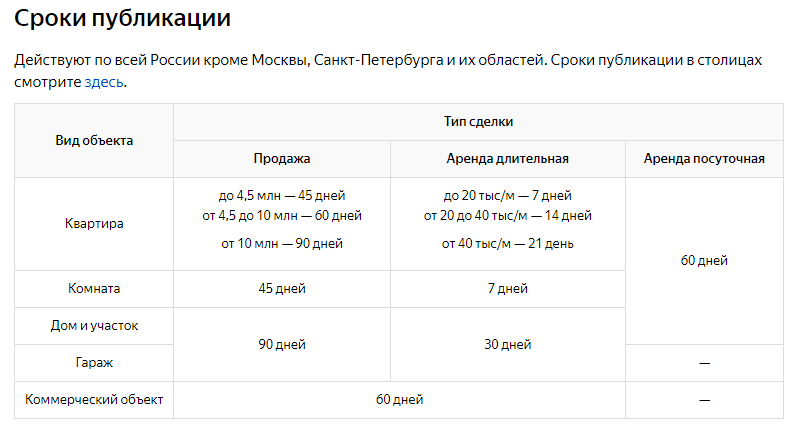

*Условия сроков публикации объявлений вносят ясности, то есть квартиры до 4.5млн висит до 45 дней, до 10млн - 60 дней, от 10млн - 90 дней. И получается либо продается за этот срок, либо заново публикуется. Из моды по данному столбцу также ясно, что большинство квартир стоят до 4.5млн*

### Влияния

*Сначла соберу все необходимые данные в отдельную таблицу*

In [ ]:
corr_data = data[['last_price_mill', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type','day','month', 'year']]
display(corr_data.head())

#### *'last_price_mill' и 'total_area'*

In [ ]:
corr_data.plot(x='total_area', y='last_price_mill', kind='scatter',alpha=0.6,\
              edgecolor='black', linewidth=1, c='last_price_mill', cmap='Set1');
plt.xlabel('Общая площадь')
plt.ylabel('Цена в мл.')
plt.title('Цена и общая площадь');

In [ ]:
data['last_price_mill'].corr(data['total_area'])

*Видно, что цена достаточно явно зависит от общей площади объекта, корреляция почти в 0,75 - это сильная корреляция*

#### *'last_price' и 'living_area'*

In [ ]:
corr_data.plot(x='living_area', y='last_price_mill', kind='scatter', alpha=0.6, \
              edgecolor='black', linewidth=1, c='last_price_mill', cmap='Set1');
plt.xlabel('Жилая площадь')
plt.ylabel('Цена в мл.')
plt.title('Цена и жилая площадь');

In [ ]:
data['last_price_mill'].corr(data['living_area'])

*Чуть меньше зависит цена от метража жилой площади, корреляция в 0,64*

#### *'last_price' и 'kitchen_area'*

In [ ]:
corr_data.plot(x='kitchen_area', y='last_price_mill', kind='scatter', alpha=0.6, \
              edgecolor='black', linewidth=1, c='last_price_mill', cmap='Set1');
plt.xlabel('Площадь кухни')
plt.ylabel('Цена в мл.')
plt.title('Цена и площадь кухни');

In [ ]:
data['last_price_mill'].corr(data['kitchen_area'])

*Еще меньше цена зависит от площади кухни, но все равно зависимость ненулева, значит люди все таки смотрят на размер кухни*

#### *'last_price' и 'rooms'*

In [ ]:
corr_data.plot(x='rooms', y='last_price_mill', kind='scatter', alpha=0.6, \
              edgecolor='black', linewidth=1, c='last_price_mill', cmap='Set1');
plt.xlabel('Количество комнат')
plt.ylabel('Цена в мл.')
plt.title('Количество комнат и цена');

*Квартиры без комнат (студии) обычно не стоят выше 10 мл. Квартиры с одной комнатой обычно не стоят выше 30 мл, но есть объявления и за 40 мл. Квартиры с двумя комнатами уже могут стоить и 55 мл., но самые дорогие квартиры - с 4 комнатами. Много квартир с 3 комнатами стоят около 30 мл. Странно что квартиры с 7 комнатами не стоят выше 30 мл, но и ниже 10 мл они тоже не стоят*

#### *'last_price' и 'floor_type'*

In [ ]:
corr_data.plot(x='floor_type', y='last_price_mill', kind='scatter', alpha=0.6, \
              edgecolor='black', linewidth=1, c='last_price_mill', cmap='Set1');
plt.xlabel('Тип этажа')
plt.ylabel('Цена в мл.')
plt.title('Цена и тип этажа');

*Среди цен за первый и за последний этаж меньше высоких, в основном высокие цены за квартиры на других этажах*

#### *'last_price' и 'day'*

In [ ]:
corr_data.plot(x='day', y='last_price_mill', kind='scatter', alpha=0.6, \
              edgecolor='black', linewidth=1, c='last_price_mill', cmap='Set1');
plt.xlabel('День недели')
plt.ylabel('Цена в мл.')
plt.title('Цена и день публикации');

*Цена не зависит от дня недели размещения объявления, хотя объявления выставленные в воскресенье не имеют таких высоких цен*

####  *'last_price' и 'month'*

In [ ]:
corr_data.plot(x='month', y='last_price_mill', kind='scatter', alpha=0.6, \
              edgecolor='black', linewidth=1, c='last_price_mill', cmap='Set1');
plt.xlabel('Месяц')
plt.ylabel('Цена в мл.')
plt.title('Цена и месяц публикации');

*Цена также не зависит от месяца размещения объявления*

#### *'last_price' и 'year'*

In [ ]:
corr_data.plot(x='year', y='last_price_mill', kind='scatter', alpha=0.6, \
              edgecolor='black', linewidth=1, c='last_price_mill', cmap='Set1');
plt.xlabel('Год')
plt.ylabel('Цена в мл.')
plt.title('Цена и год публикации');

*Похоже что старые квартиры стоят меньше, а самые дорогие квартиры были выставлены в 2016 году*

### Доп. расчеты

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

*Сначала посчитаю города в которых больше всего объявлений*

In [ ]:
loc_freq = data['locality_name'].value_counts()
print(loc_freq.head(10))

*Создам отдельную переменную, чтобы потом к ней обратиться и сделаю срез с значениями только по нужным городам*

In [ ]:
loc_freq_ten = ['Санкт-Петербург', 'Мурино', 'Кудрово', 'поселок Шушары', 'Всеволожск', 'Пушкин', \
                'Колпино', 'поселок Парголово', 'Гатчина', 'Выборг']
data_ten = data.query('locality_name in @loc_freq_ten')
display(data_ten.head(10))

*Выберу из этой таблицы только нужные для подсчета столбцы*

In [ ]:
data_ten = data_ten[['locality_name', 'price_mkv']]
print(data_ten.head())

*Расчитаю среднее значение цены за м.кв. по каждому населенному пункту*

In [ ]:
data_ten_table = round(data_ten.pivot_table(index='locality_name', values='price_mkv', aggfunc='mean'),1)
display(data_ten_table)

In [ ]:
data_ten_table = data_ten_table.reset_index()
data_ten_table.columns = ['locality_name', 'price_mkv']
display(data_ten_table)

In [ ]:
data_ten_table = data_ten_table.sort_values('price_mkv', ascending=False)

In [ ]:
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=data_ten_table, x='locality_name', y='price_mkv', ci=False, palette='viridis');
g.set_xticklabels(data_ten_table['locality_name'], rotation=55, fontdict={'fontsize':10});
plt.xlabel('Город')
plt.ylabel('Цена за кв.м.')
plt.title('Города по цене за м.кв.')
plt.show();

*Вывод:*

1) В Санкт-петербурге самая высокая средняя стоимость квадратного метра недвижимости, в Пушкине тоже получается достаточно высокая

2) В Выборге получается самая низкая средняя стоимость квадратного метра

**Теперь можно вычислить среднюю цену каждого километра**

*Смотрю на выброс на 27 км*

In [ ]:
display(data[(data['center_km'] == 27) & (data['locality_name'] == 'Санкт-Петербург')])

*за 74 м.кв. цена в 14 миллионов не выглядит адекватно, так что придется выбросить это значение* 

In [ ]:
data = data.drop(index = data.query('center_km == 27 and last_price_mill == 14.35').index)
display(data[(data['center_km'] == 27) & (data['locality_name'] == 'Санкт-Петербург')])

*выберем только данные по СПб, а также выберем только нужные нам столбцы - это цена и расстояние в км до центра*

In [ ]:
data_saint_p = data.loc[data['locality_name'] == 'Санкт-Петербург']
data_saint_pp = data_saint_p[['locality_name', 'center_km', 'last_price_mill', 'price_mkv']]
display(data_saint_pp.head())

*Создадим новый столбец для цены каждого км от центра города*

*Построю дополнительный столбец с количеством объявлений на каждом километре, чтобы разобраться что происходит на 3 и 5 км*

In [ ]:
dsppt = data_saint_pp.pivot_table(index='center_km', values='price_mkv', aggfunc=['count', 'mean'])
dsppt = dsppt.reset_index()
dsppt.columns = ['center_km', 'count_price_mkv', 'mean_price_mkv']
display(dsppt)

In [ ]:
dsppt.plot(x='center_km', y='count_price_mkv', kind='scatter',\
           edgecolor='black', linewidth=1, c='mean_price_mkv', cmap='Set1');
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Количество объявлений')
plt.title('Средняя цена за кв.м. и расстояние до центра');

*Из графика видно, что: большинство объявлений о квартирах на 10-17 км от центра.Очень дорогое жилье прямо в центре, затем идет достаточно резкий спад цены, а количество объявлений растет вплоть до 15 км от центра, затем количество объявлений падает и цена тоже*

In [ ]:
dsppt.plot(x='center_km', y='mean_price_mkv', kind='scatter', \
              edgecolor='black', linewidth=1, c='mean_price_mkv', cmap='Set1');
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Средняя цена')
plt.title('Отношение средней цена за км и км от центра города');

*Этот график без параметра количества объявлений и на нем очень хорошо видно как снижается цена при удалении от центра города. Есть интересная аномалия примерно на 3 км  от центра, где есть квартиры средняя цена за кв.м. ниже ожидаемой, может быть это коммунальное жилье?*

In [ ]:
data_saint_pp['last_price_mill'].corr(data_saint_p['center_km'])

*То есть цена кв.м. слегка снижается с каждым километром от центра города*

## Общий вывод

**В результате исследования мы узнали, что:**

* Апартаменты встречаются достаточно редко

* В основном балконов нет, 1 и 2 балкона в квартире встречаются примерно равное количество раз, больше – реже.

* Средняя общая площадь - 57 м.кв., а медианное значение - 50, несильный разброс. Большинство объектов недвижимости находятся в пределах от 27 до 75 м.кв.

* Среднее по жилой площади - 32.5 м.кв., медианное значение - 29.8. Явный пик до 20 кв.м. и небольшой пик примерно на 30 кв.м.

* Средняя площадь кухни - 10 м.кв, а медианное значение - 9,2 м.кв. Большинство кухонь находится в диапазоне от ~ 6 до 12 м.кв. С большим пиком на 10 кв.м Большинство кухонь, видимо 7, 9 и 11 м.кв.

*В датасет добавлены столбцы цена одного квадратного метра, день публикации объявления (0 - понедельник, 1 - вторник и т.д.), месяц публикации объявления, год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»), расстояние в км до центра города.*

* В среднем количество комнат равно двум, большинство объектов имеют либо 1, либо 2, либо 3 комнаты.

* В среднем высота потолка это 2,6 м.

* Большинство квартир находится на 2 и 3 этажах.

* Большинство объектов располагаются либо в зданиях с 5 этажами, либо с 9.

* Большинство объектов находятся на удалении от 10 до 17 км от центра города.

* Чаще всего ближайший парк находится в 400 - 600 метров от объекта, но самих данных мало, поэтому сложно сказать насколько это репрезентативные данные.

* Реже всего объявления размещают в выходные, предполагаю, что это связано с тем, что размещением часто занимаются агенты, а у них рабочая неделя стандартная.

* Чаще всего объявления размешают в феврале-марте-апреле, потом спад, а затем снова плавный подъем с пиком в ноябре
Обычно продажа занимает до 100 дней. Условно быстрая продажа — это примерно до 43 дней. Очень долгая - от 207 дней и далее. Особо сложные случаи - около двух лет.

* Больше всего объявлений за 2017 и 2018ые года, и меньше всего висят объявления 2019 года -  может он просто еще не закончился, когда выгружали датасет.

* Цена сильно зависит от: общей площади, чуть меньше от жилой площади, еще меньше от метража кухни. 

* Чем больше комнат, тем выше нижний порог цены, но и среди одинакового количества комнат есть и дорогие и подешевле квартиры, возможно площадь комнат и расположение имеют вес.

* Среди цен за первый и за последний этаж меньше высоких, в основном высокие цены за квартиры на остальных этажах.

* Цена не зависит от дня недели размещения объявления, хотя объявления выставленные в воскресенье не имеют таких высоких цен. Цена также не зависит от месяца размещения объявления и не зависит от года размещения объявления, хотя в 2015 и 2016 году были выставлены дорогие квартиры на продажу, может это связано с экономической ситуацией.

* В Санкт-петербурге самая высокая средняя стоимость квадратного метра недвижимости, в Пушкине и Кудрово тоже получается достаточно высокая. В Выборге получается самая низкая средняя стоимость квадратного метра.

* Большинство объявлений о квартирах на 10-17 км от центра. На 3 км цена резко ниже, чем на предыдущем, потом до 7 км снова растет, потом снова падает.

* Чем дальше от центра тем меньше стоит кв.м. недвижимости.
